Linear Regression Implementation on House Pricing.

In [ ]:
# Importing python libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# importing the data for linear regression.
from sklearn.datasets import fetch_california_housing

In [ ]:
# fetching the bunch of dataset
data=fetch_california_housing(as_frame=True)  

In [ ]:
# storing the depndent and independent variables 
# here x is storing the features dataframe
# and y is storing the series of target
x=data.data
y=data.target

In [19]:
x.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [18]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split  #importing the train test module

In [ ]:
# train/test split 20:80
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
# random_state is used to shuffle the data for following times.

In [24]:
x_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [ ]:
# importing the module for standardizing the dataset.
from sklearn.preprocessing import StandardScaler

In [ ]:
# creating an instance for standardizing the dataset.
scaler=StandardScaler()

In [ ]:
x_train=scaler.fit_transform(x_train)   #fit finds the mean and standard deviation on tarining_data and tarnsform applies it on data.
x_test=scaler.transform(x_test)         #only tarnsform is used to use the same mean and standard deviation value to apply on testing data .

In [ ]:
# importing the linear regresssion module.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [ ]:
# perfomring linear regression or can say training the model
regression=LinearRegression()
regression.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# finding the mean squared error 
mse=cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error',cv=5)
mse

array([-0.52006533, -0.50229277, -0.52054451, -0.50789718, -0.54552622])

In [ ]:
# finding the mean of mse the smalller the mse best the model trained.
np.mean(mse)

np.float64(-0.5192652011433682)

In [ ]:
# predicting the value for x_test.
reg_pred=regression.predict(x_test) 

In [ ]:
reg_pred

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251], shape=(4128,))

<Figure size 300x400 with 0 Axes>

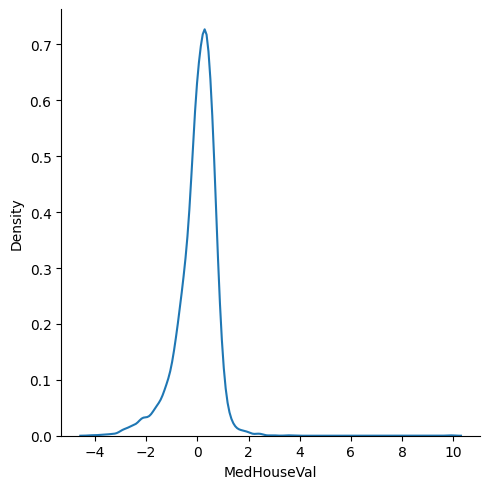

In [ ]:
# showing the residual error 
plt.figure(figsize=(3,4))
sns.displot(reg_pred-y_test,kind='kde')
plt.show()

In [47]:
from sklearn.metrics import r2_score
# finding the r2_score means how much correct my model predicted the output the closer to 1 is the better
score=r2_score(y_test,reg_pred)

In [48]:
score

0.5757877060324508